In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [2]:
exp_data=np.loadtxt("spectrum.txt")
lamb=exp_data[:,0]
spec=exp_data[:,1]

Text(0, 0.5, 'Spectrum')

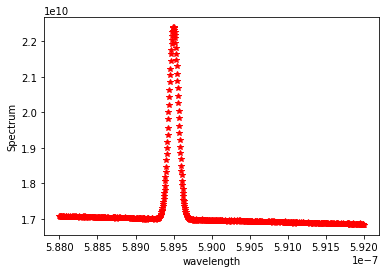

In [3]:
#Plotting data
plt.plot(lamb, spec, '* r')
plt.xlabel("wavelength")
plt.ylabel("Spectrum")

Text(0, 0.5, 'Spectrum')

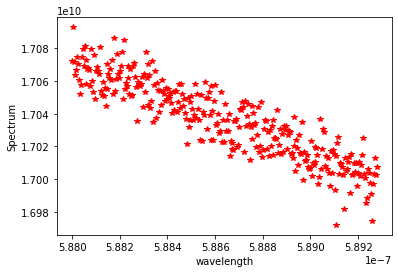

In [4]:
#Taking the linear regime to fit into a straight line
lamb2=exp_data[0:320,0]
spec2=exp_data[0:320,1]
plt.plot(lamb2, spec2, '* r')
plt.xlabel("wavelength")
plt.ylabel("Spectrum")

In [5]:
#Using matrix form to get beta=[a,b]
N=len(lamb2)
X=np.c_[lamb2,np.ones(N)]
nbparan=len(X.T)
Hessian=np.linalg.inv(np.dot(X.T,X))
beta=np.dot(Hessian,np.dot(X.T,spec2))
print('Beta = ',beta,'\n')

Beta =  [-5.70391477e+16  5.06114861e+10] 



Text(0, 0.5, 'Spectrum')

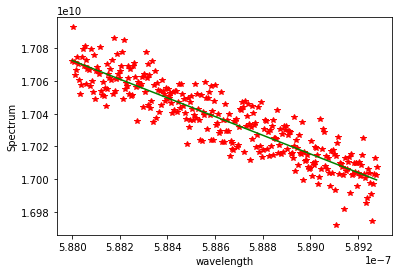

In [6]:
#Plot restricted data and linear fitting
plt.plot(lamb2, spec2, '* r')
plt.plot(lamb2,beta[0]*lamb2+beta[1],'g')
plt.xlabel("wavelength")
plt.ylabel("Spectrum")

Text(0, 0.5, 'Spectrum')

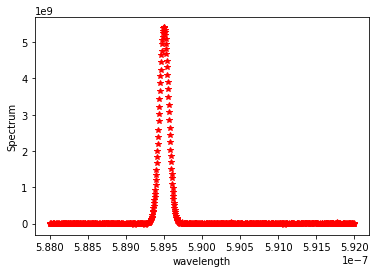

In [7]:
#Plot data without background. Meaning, (experimental data-linear fitting) or spec-straightline.
plt.plot(lamb,spec-(beta[0]*lamb+beta[1]),'* r')
plt.xlabel("wavelength")
plt.ylabel("Spectrum")

The data is centered at spec=0


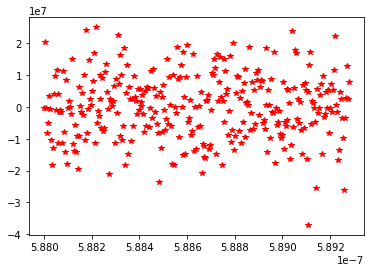

In [8]:
#For corroborating data are centered at spectrum=0
plt.plot(lamb2,spec2-(beta[0]*lamb2+beta[1]),'* r')
print("The data is centered at spec=0")

In [9]:
def Delta_lam(T):
    M=23
    lamb_0=5.895e-7
    return 7.17e-7*lamb_0*np.sqrt(T/M)
def G(lamb,Gmax,Delta_lamb):
    lamb_0=5.895e-7
    return Gmax*np.exp(-(4*np.log(2)*(lamb-lamb_0)**2)/(Delta_lamb**2))

Text(0.5, 1.0, 'At Gmax = 5000000000.0 , Delta_lamb = 1e-09')

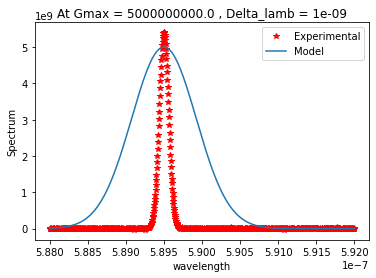

In [10]:
#Plot data and model.
plt.plot(lamb,spec-(beta[0]*lamb+beta[1]),'* r')
plt.plot(lamb,G(lamb,5e9,1e-9))
plt.xlabel("wavelength")
plt.ylabel("Spectrum")
plt.legend(["Experimental","Model"])
plt.title("At Gmax = {} , Delta_lamb = {}".format(5e9,1e-9))

In [11]:
#Residue considering without background i.e. model-(data -background)
def residue(param):
    return G(lamb,param[0],param[1])-(spec-(beta[0]*lamb+beta[1]))

In [16]:
Gmax0=5e9
delta_lamb0=1e-9
param_deb=(Gmax0,delta_lamb0)
LM=op.leastsq(residue, param_deb, full_output=1)
param=LM[0]
cov_mat=LM[1]
print("The parameters optimized are:\n Gmax = {} \n delta_lambda= {}".format(param[0],param[1]))
print()
print("The variance-covariance matrix is: \n",cov_mat)
print()
print("uncertanties:\n s_Gmax= {} \n s_Delta_lamb={}".format(np.sqrt(cov_mat[0,0]),np.sqrt(cov_mat[1,1])))
print()
print("Gmax = {} +- {}".format(param[0],1.96*np.sqrt(cov_mat[0,0])))
print("Delta_lambda = {} +- {}".format(param[1],1.96*np.sqrt(cov_mat[1,1])))

The parameters optimized are:
 Gmax = 5410700771.581595 
 delta_lambda= 1.445921032957475e-10

The variance-covariance matrix is: 
 [[ 5.51853801e-02 -9.83158965e-22]
 [-9.83158965e-22  5.25466111e-41]]

uncertanties:
 s_Gmax= 0.2349156871828499 
 s_Delta_lamb=7.248904129935845e-21

Gmax = 5410700771.581595 +- 0.4604347468783858
Delta_lambda = 1.445921032957475e-10 +- 1.4207852094674256e-20


Text(0.5, 1.0, 'At Gmax = 5410700771.581595 , Delta_lamb = 1.445921032957475e-10')

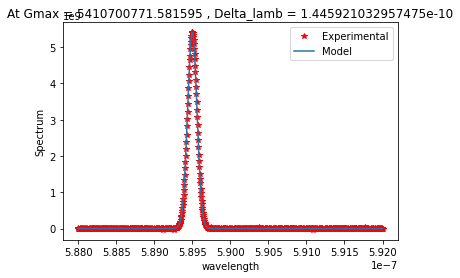

In [17]:
#Plot with fitted parameters G_max and Delta_lamb
plt.plot(lamb,spec-(beta[0]*lamb+beta[1]),'* r')
plt.plot(lamb,G(lamb,param[0],param[1]))
plt.xlabel("wavelength")
plt.ylabel("Spectrum")
plt.legend(["Experimental","Model"])
plt.title("At Gmax = {} , Delta_lamb = {}".format(param[0],param[1]))

In [18]:
#4)From equation (2), isolating T and using the value of Delta_lamb optimized we have the output
lamb_0=5.895e-7
M=23
T=M*(param[1]/(lamb_0*7.17e-7))**2
print("The temperature of the gas is: {} K".format(T))

The temperature of the gas is: 2691603.3255148847 K
